In [14]:
from sklearn.model_selection import train_test_split  # Importa a função para dividir os dados em conjuntos de treino e teste.
import numpy as np  # Importa o NumPy, uma biblioteca fundamental para trabalhar com arrays e operações matemáticas em Python.
from sklearn.tree import DecisionTreeClassifier  # Importa o classificador de árvore de decisão do Scikit-learn.
import pandas as pd  # Importa o pandas, uma biblioteca para manipulação e análise de dados, especialmente DataFrames.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Importa várias métricas para avaliar o desempenho do modelo.
import matplotlib.pyplot as plt  # Importa o Matplotlib para visualização de dados.
import seaborn as sns  # Importa o Seaborn, que é uma biblioteca para visualizações estatísticas, complementando o Matplotlib.
from sklearn import tree  # Importa o módulo de árvores do Scikit-learn, usado para visualização e manipulação de árvores de decisão.


In [10]:
# Criando um DataFrame com pandas, contendo informações sobre velocidade, complexidade, manutenção e classificação.
data = pd.DataFrame({
    'velocidade': [10, 5, 8, 6, 12, 4],  # Representa a velocidade de algum processo ou objeto.
    'complexidade': [0, 2, 1, 2, 0, 2],  # Indica a complexidade, possivelmente de tarefas, com valores que podem representar diferentes níveis.
    'manutencao': [0, 2, 1, 2, 0, 1],  # Número de manutenções realizadas, onde os valores podem representar a quantidade ou frequência.
    'classif': ['montagem', 'teste', 'montagem', 'teste', 'montagem', 'teste']  # Classificação das instâncias, indicando se são para montagem ou teste.
})

Acurácia: 1.0
Precisão: 1.0


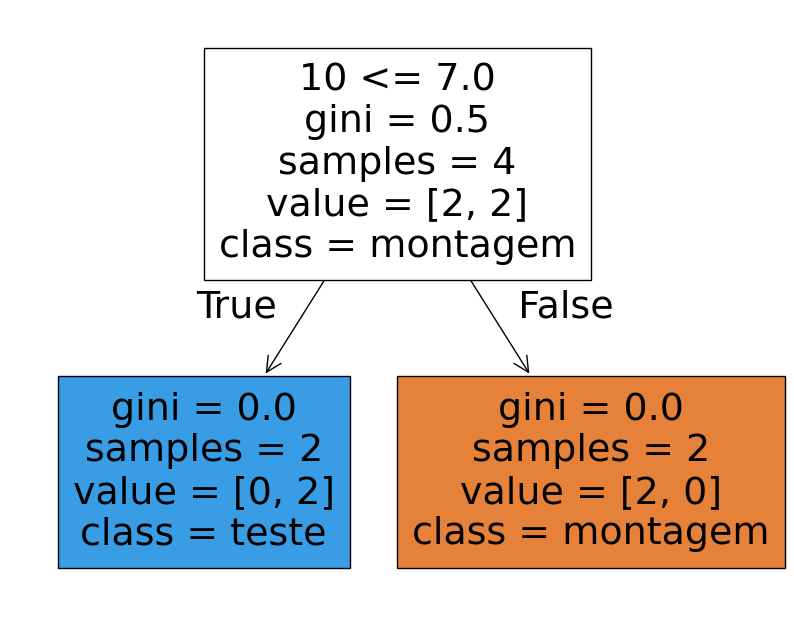

In [12]:
x = np.array(data['velocidade'])  
y = np.array(data['classif'])  # Extrai a coluna 'classif' do DataFrame e a converte em um array NumPy.

# Divide os dados em conjuntos de treino e teste, usando 20% dos dados para teste.
x_treino, x_teste, y_treino, y_teste = train_test_split(x.reshape(-1, 1), y.reshape(-1, 1), test_size=0.2, random_state=42)

model = DecisionTreeClassifier()  # Cria um modelo de classificador de árvore de decisão.
model.fit(x_treino, y_treino)  # Treina o modelo usando os dados de treino.

prev = model.predict(x_teste)  # Faz previsões sobre o conjunto de teste.
accuracy = accuracy_score(y_teste, prev)  # Calcula a acurácia das previsões.
precisao = precision_score(y_teste, prev, pos_label='montagem')  

matrix = confusion_matrix(y_teste, prev)  # Gera a matriz de confusão para as previsões.

# Exibe os resultados de acurácia e precisão.
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precisao}')

# Cria uma visualização da árvore de decisão treinada.
fig = plt.figure(figsize=(10, 8))
tree.plot_tree(model, feature_names=x.tolist(), class_names=y.tolist(), filled=True)
plt.show()  # Mostra o gráfico da árvore de decisão.

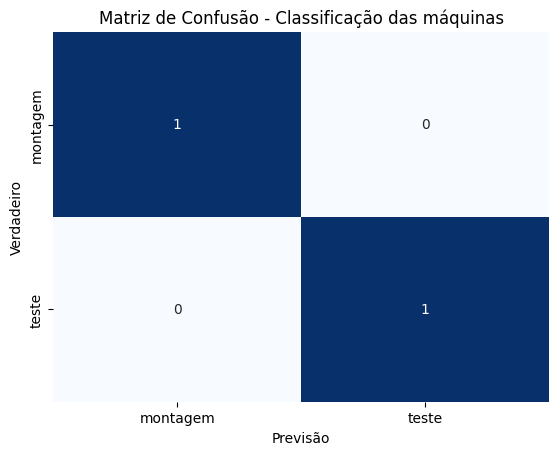

In [13]:
# Cria um heatmap da matriz de confusão usando Seaborn.
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['montagem', 'teste'],  # Rótulos do eixo x para as previsões, indicando as classes 'montagem' e 'teste'.
            yticklabels=['montagem', 'teste'])  # Rótulos do eixo y para os valores reais, também indicando as classes 'montagem' e 'teste'.

# Adiciona rótulo ao eixo x.
plt.xlabel('Previsão')  # Define o título do eixo x como 'Previsão'.

# Adiciona rótulo ao eixo y.
plt.ylabel('Verdadeiro')  # Define o título do eixo y como 'Verdadeiro'.

# Adiciona um título ao gráfico.
plt.title('Matriz de Confusão - Classificação das máquinas')  # Define o título do gráfico.

# Exibe o gráfico.
plt.show()  # Mostra o heatmap na tela.
